In [1]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
from aging.plotting import figure, format_plots

In [2]:
format_plots()

In [27]:
# df = pl.scan_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/ontogeny_females_syllable_df_v00.parquet')
df = pl.scan_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11-1/ontogeny_females_syllable_df_v00.parquet')

In [28]:
filt_df = df.filter(pl.col('age') == 28).collect()
filt_df = filt_df.to_pandas()

In [29]:
filt_df2 = df.filter(pl.col('age') == 24).collect()
filt_df2 = filt_df2.to_pandas()

In [30]:
filt_df3 = df.filter(pl.col('age') == 36).collect()
filt_df3 = filt_df3.to_pandas()

In [31]:
filt_df.head()

,experiment,file,uuid,date,age,syllables,pc_00,pc_01,pc_02,pc_03,...,width_mm,width_px,angle,velocity_theta,recon_width,recon_length,recon_height,recon_area,onsets,mouse
0,ontogeny_females,/n/groups/datta/Dana/Ontogeny/raw_data/Ontogen...,b9978097-c10f-4f71-9e28-f6b9ce803d0c,2023-12-01 19:40:51,28,71,579.857544,58.689404,-19.018951,5.327394,...,27.946732,16.664738,0.697609,0.000000,16.955877,37.241035,28.173584,530.0,True,28F_03_03
1,ontogeny_females,/n/groups/datta/Dana/Ontogeny/raw_data/Ontogen...,b9978097-c10f-4f71-9e28-f6b9ce803d0c,2023-12-01 19:40:51,28,71,598.993958,91.579155,-28.441275,2.388904,...,27.832853,16.596832,0.720871,-0.800698,16.889950,38.963902,28.600725,551.0,False,28F_03_03
2,ontogeny_females,/n/groups/datta/Dana/Ontogeny/raw_data/Ontogen...,b9978097-c10f-4f71-9e28-f6b9ce803d0c,2023-12-01 19:40:51,28,71,606.456543,112.280968,-32.792458,-1.702122,...,27.852242,16.608393,0.817080,-0.732505,16.781088,40.119167,28.645390,564.0,False,28F_03_03
3,ontogeny_females,/n/groups/datta/Dana/Ontogeny/raw_data/Ontogen...,b9978097-c10f-4f71-9e28-f6b9ce803d0c,2023-12-01 19:40:51,28,71,635.739380,140.702469,-58.618954,-7.032803,...,27.482937,16.388176,0.855665,-0.846179,17.019539,41.966938,29.152174,598.0,False,28F_03_03
4,ontogeny_females,/n/groups/datta/Dana/Ontogeny/raw_data/Ontogen...,b9978097-c10f-4f71-9e28-f6b9ce803d0c,2023-12-01 19:40:51,28,71,655.817139,151.605942,-50.080307,-10.575765,...,27.813402,16.585234,0.850830,-0.882819,16.978659,42.055107,30.056856,598.0,False,28F_03_03


In [59]:
vc = filt_df.groupby('mouse')['syllables'].value_counts(normalize=True).reset_index()

In [61]:
(vc.groupby('mouse').apply(lambda x: (x['proportion'] > 0.2).sum()) > 0).sum()

/tmp/ipykernel_9111/2490587023.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  (vc.groupby('mouse').apply(lambda x: (x['proportion'] > 0.2).sum()) > 0).sum()


5

<Axes: xlabel='syllables', ylabel='proportion'>

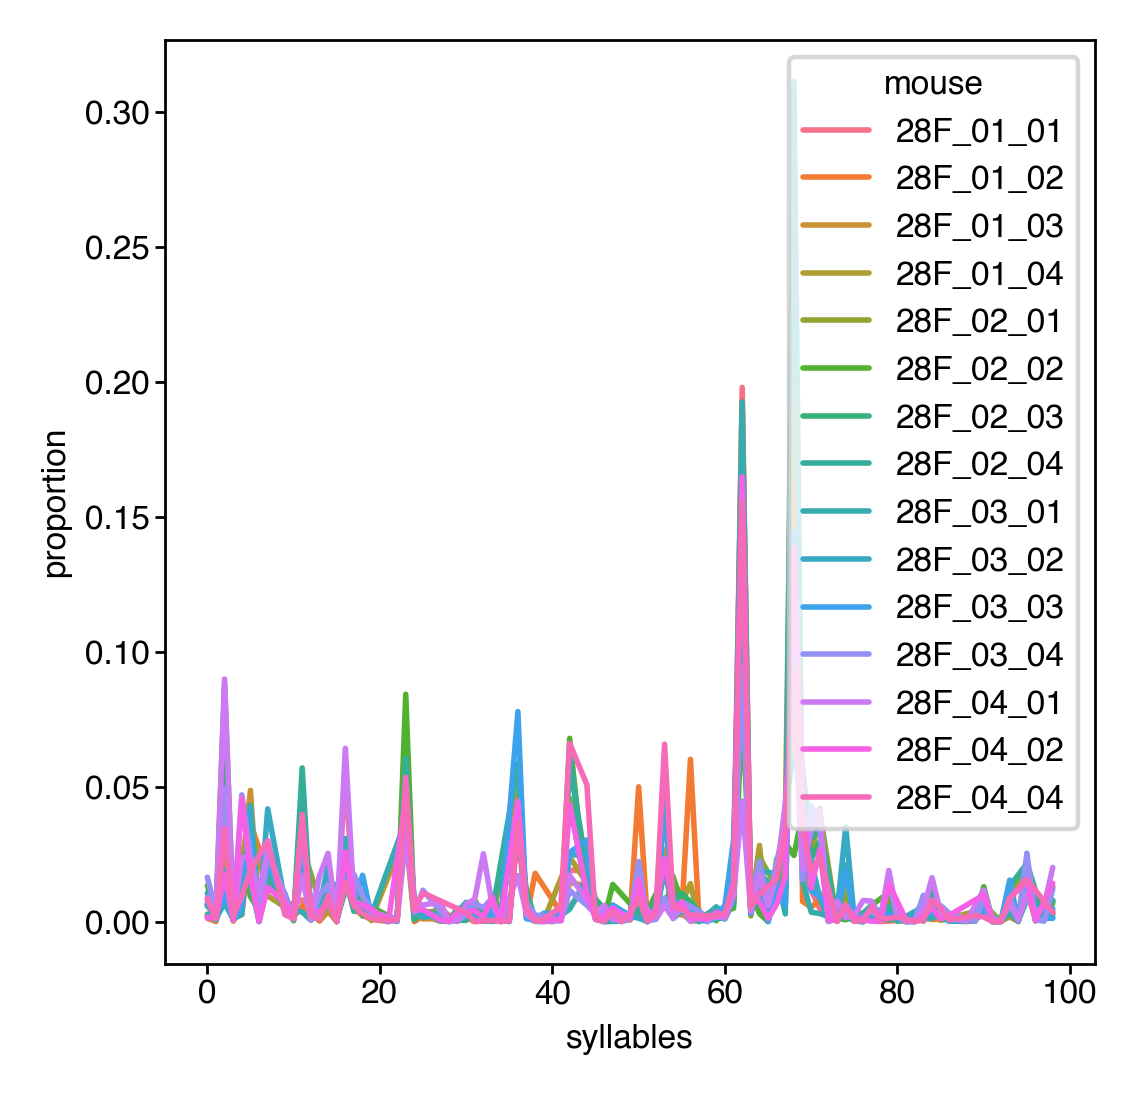

In [52]:
sns.lineplot(data=vc, x='syllables', y='proportion', hue='mouse')

<Axes: xlabel='syllables', ylabel='mouse'>

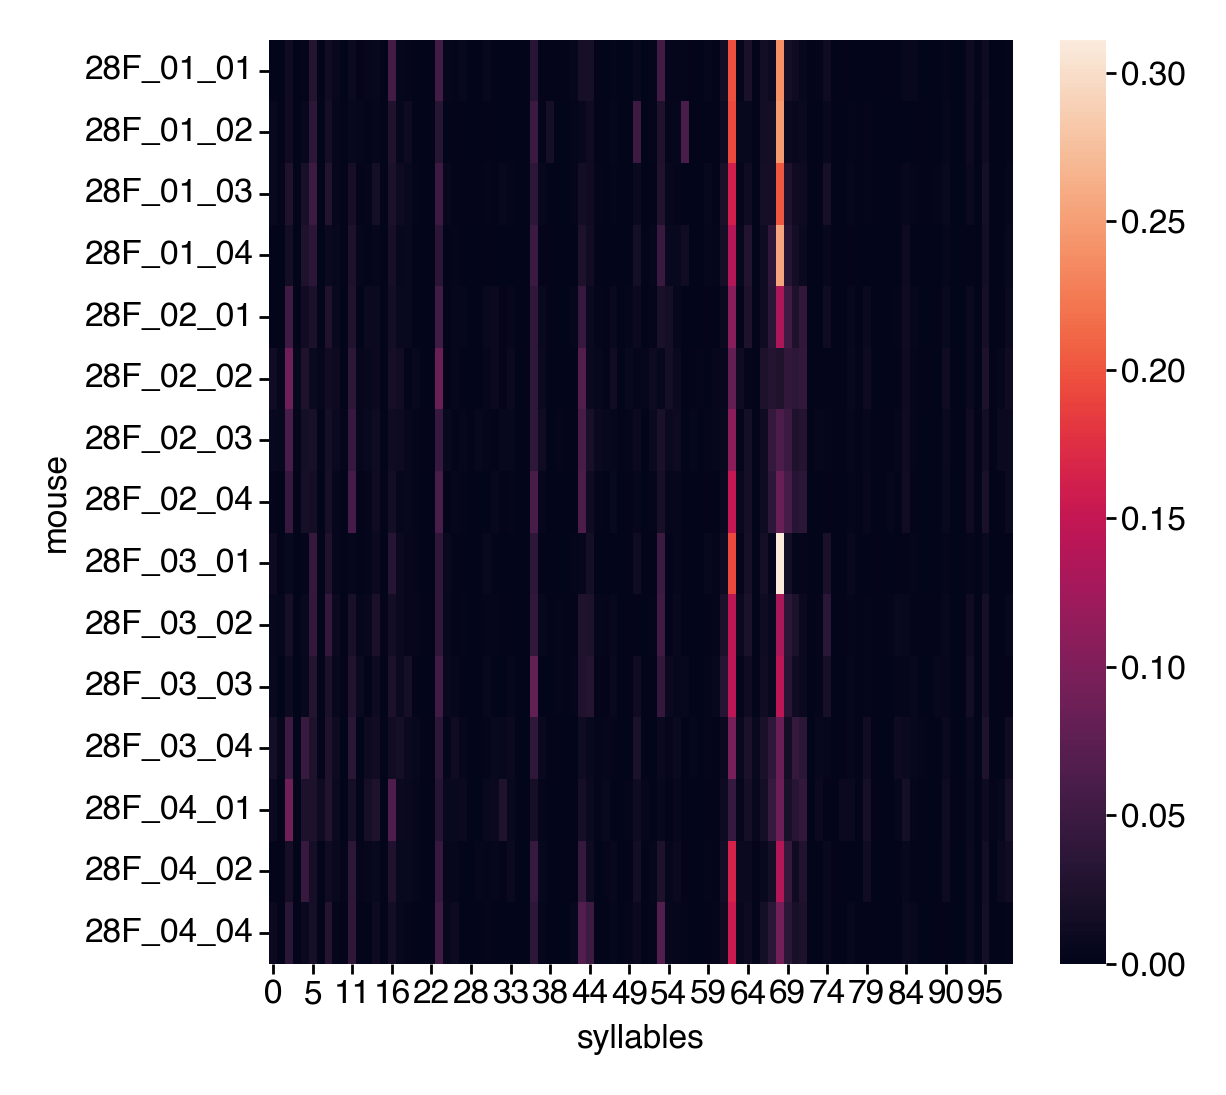

In [51]:
# sns.heatmap(vc.pivot_table(index='mouse', columns='syllables', values='count', fill_value=0))
sns.heatmap(vc.pivot_table(index='mouse', columns='syllables', values='proportion', fill_value=0))

In [34]:
vc = filt_df2.groupby('mouse')['syllables'].value_counts().reset_index()

In [63]:
vc = filt_df2.groupby('mouse')['syllables'].value_counts(normalize=True).reset_index()

In [64]:
(vc.groupby('mouse').apply(lambda x: (x['proportion'] > 0.2).sum()) > 0).sum()

/tmp/ipykernel_9111/2490587023.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  (vc.groupby('mouse').apply(lambda x: (x['proportion'] > 0.2).sum()) > 0).sum()


0

<Axes: xlabel='syllables', ylabel='mouse'>

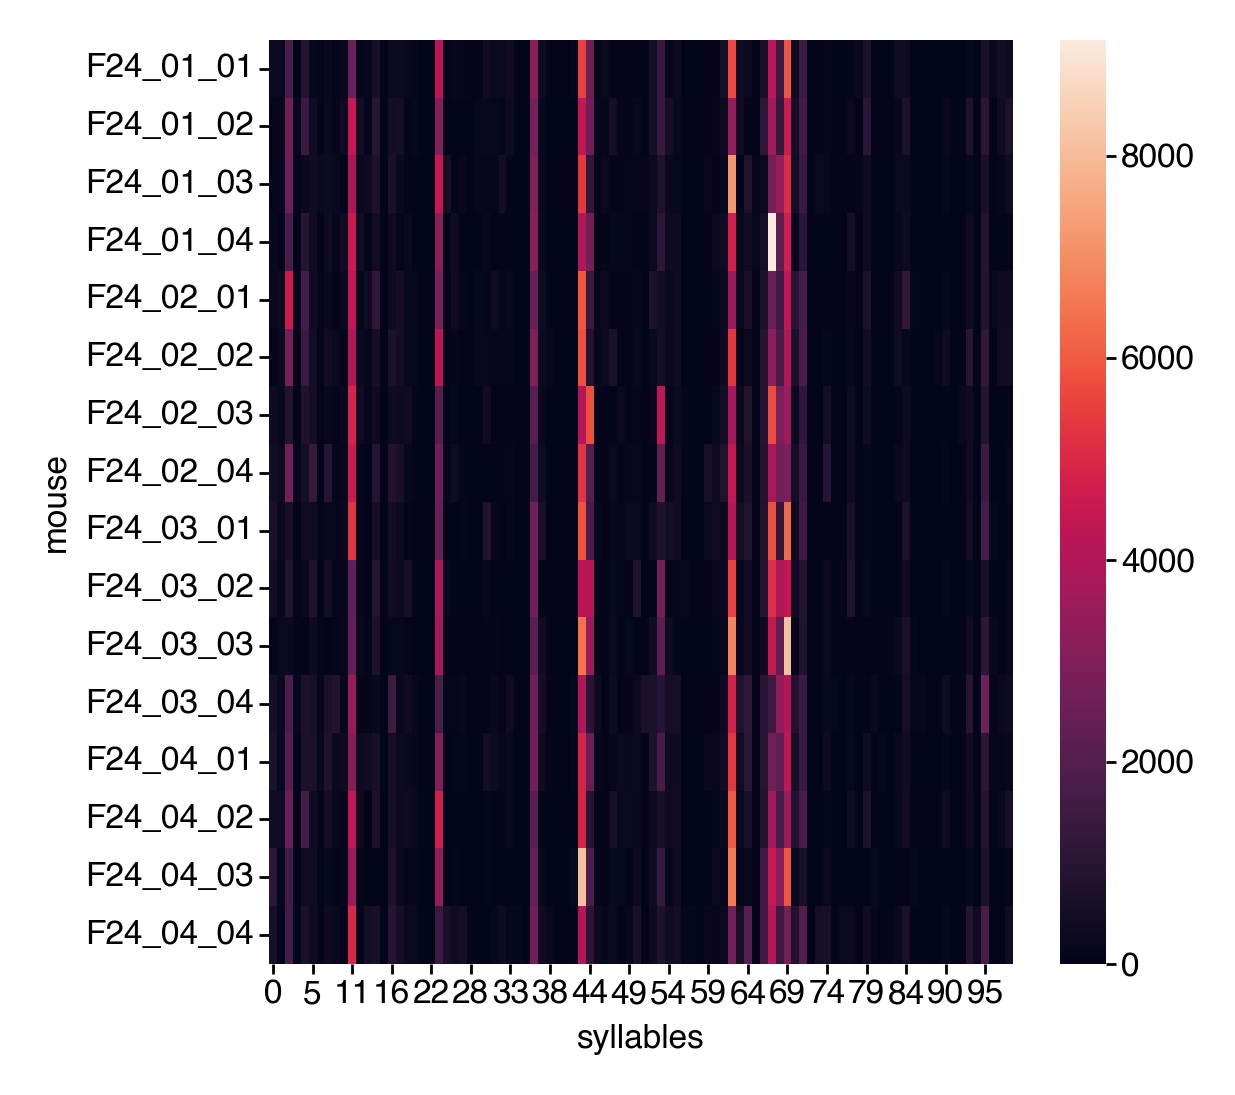

In [35]:
sns.heatmap(vc.pivot_table(index='mouse', columns='syllables', values='count', fill_value=0))

In [36]:
vc = filt_df3.groupby('mouse')['syllables'].value_counts().reset_index()

In [65]:
vc = filt_df3.groupby('mouse')['syllables'].value_counts(normalize=True).reset_index()

In [66]:
(vc.groupby('mouse').apply(lambda x: (x['proportion'] > 0.2).sum()) > 0).sum()

/tmp/ipykernel_9111/2490587023.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  (vc.groupby('mouse').apply(lambda x: (x['proportion'] > 0.2).sum()) > 0).sum()


0

<Axes: xlabel='syllables', ylabel='mouse'>

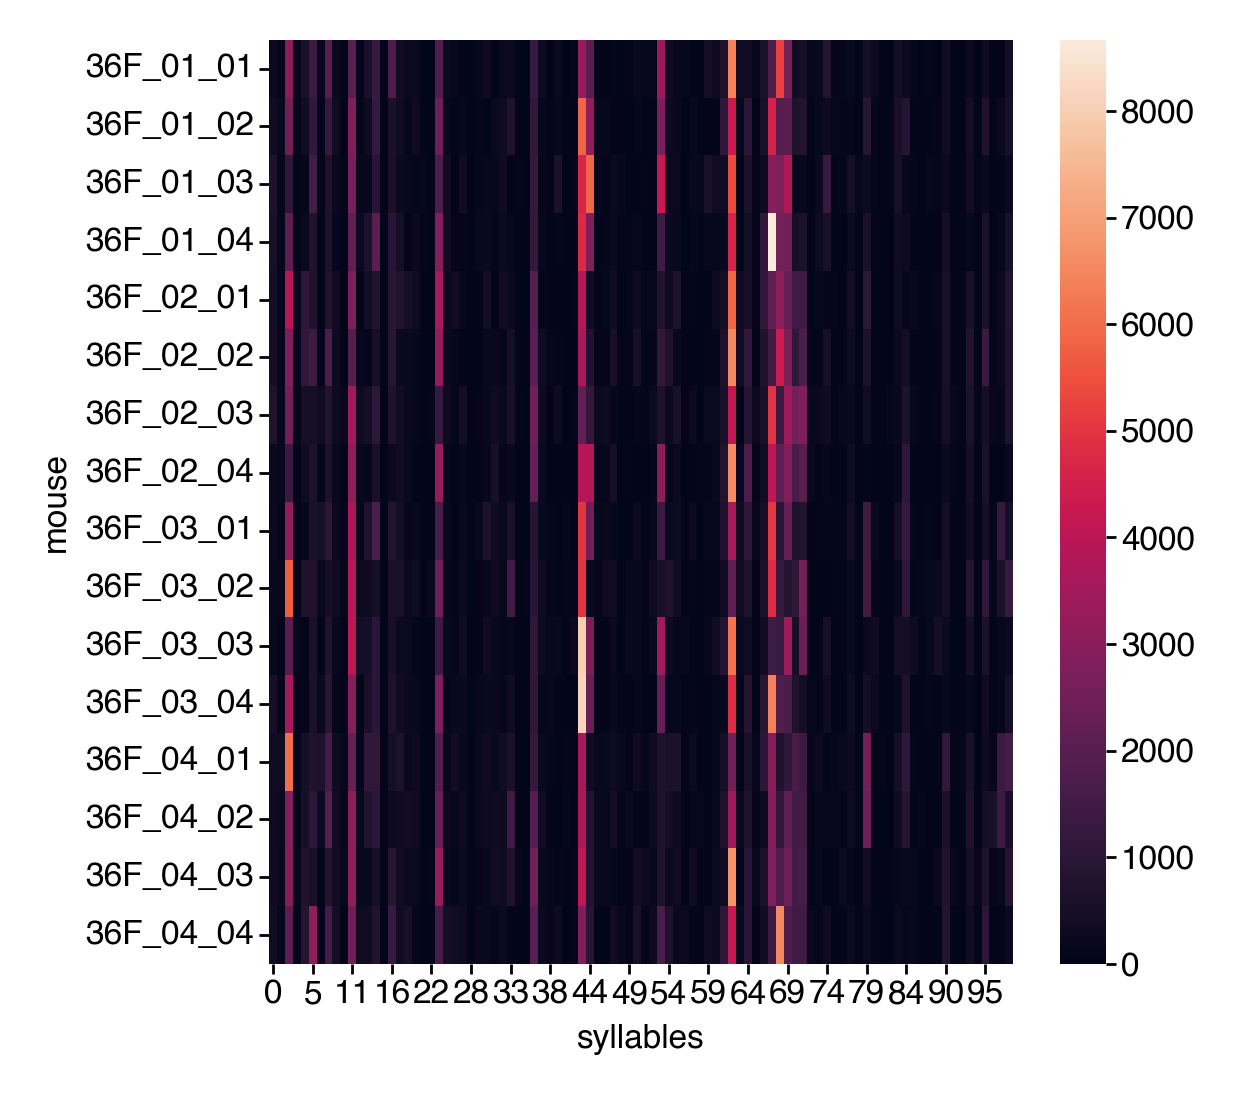

In [37]:
sns.heatmap(vc.pivot_table(index='mouse', columns='syllables', values='count', fill_value=0))

In [38]:
vc = filt_df.query('onsets').groupby('mouse')['syllables'].value_counts().reset_index()

<Axes: xlabel='syllables', ylabel='mouse'>

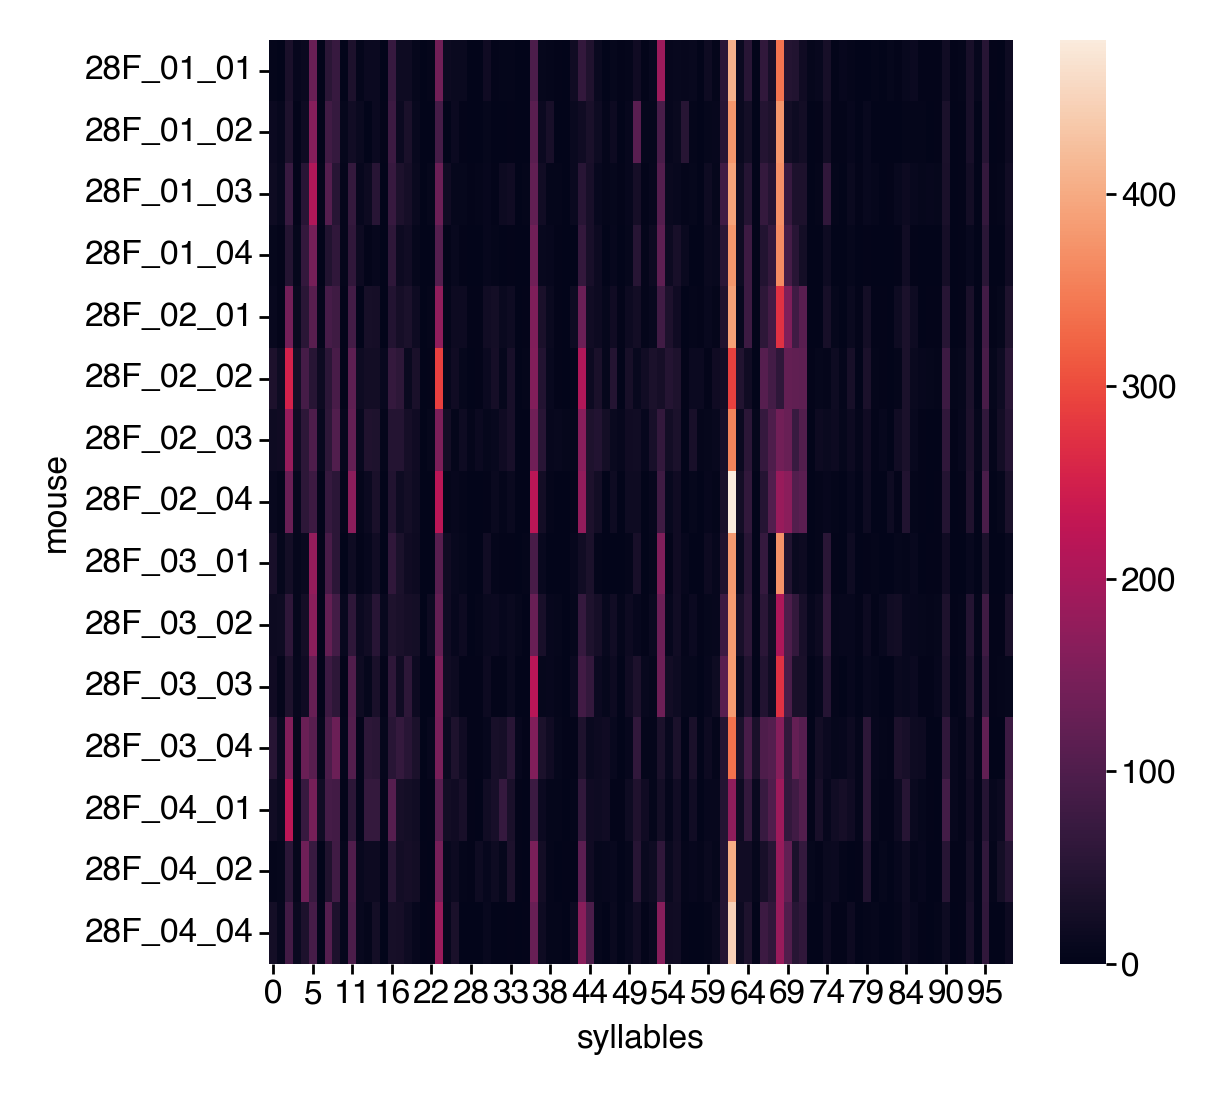

In [39]:
sns.heatmap(vc.pivot_table(index='mouse', columns='syllables', values='count', fill_value=0))

In [40]:
vc = filt_df2.query('onsets').groupby('mouse')['syllables'].value_counts().reset_index()

<Axes: xlabel='syllables', ylabel='mouse'>

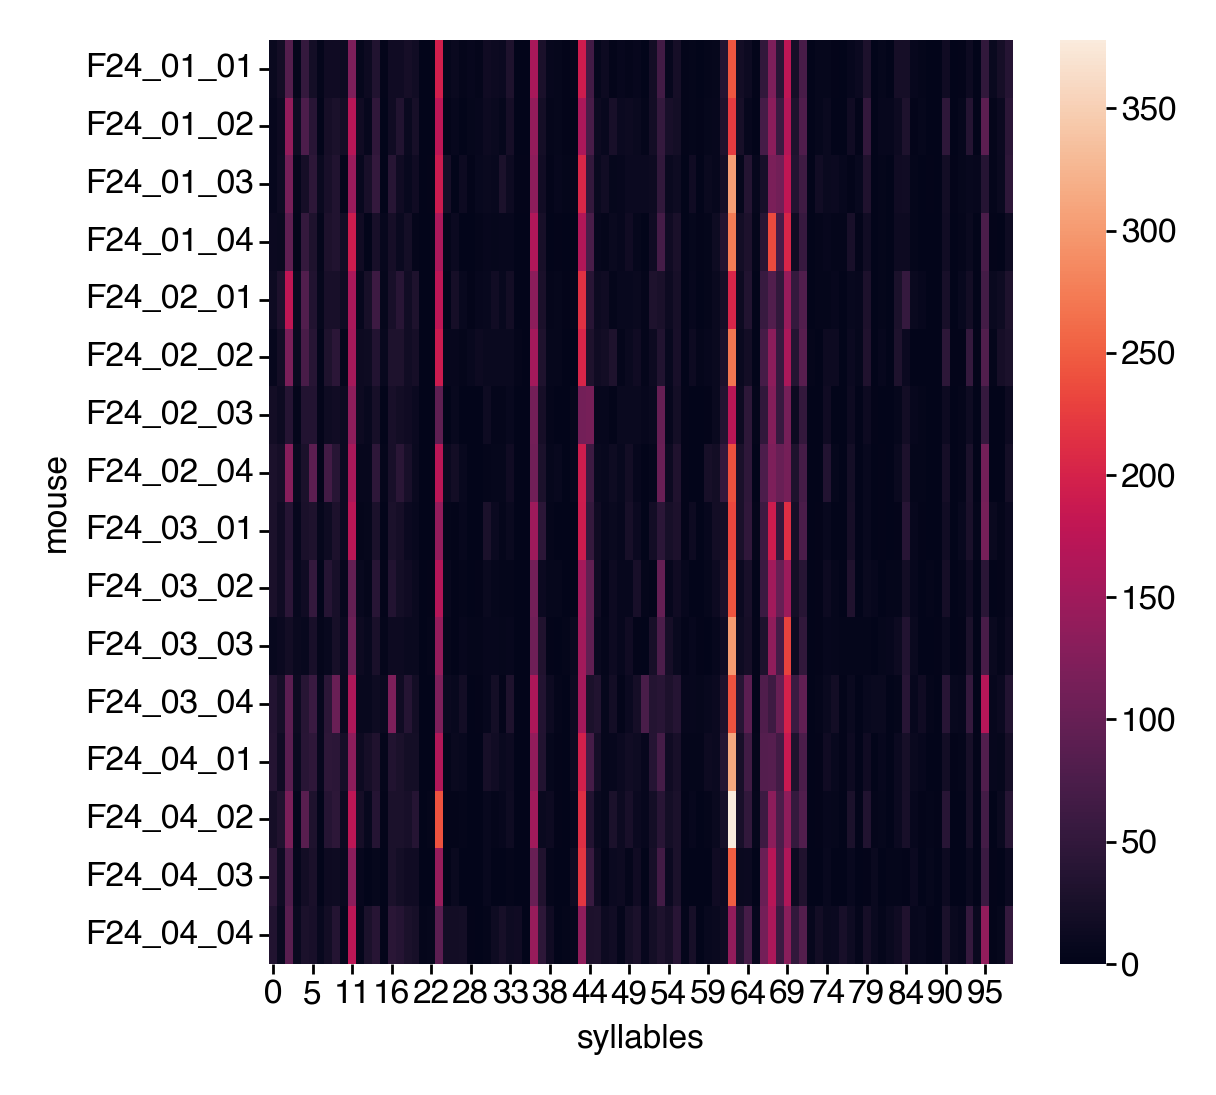

In [41]:
sns.heatmap(vc.pivot_table(index='mouse', columns='syllables', values='count', fill_value=0))

In [42]:
vc = filt_df3.query('onsets').groupby('mouse')['syllables'].value_counts().reset_index()

<Axes: xlabel='syllables', ylabel='mouse'>

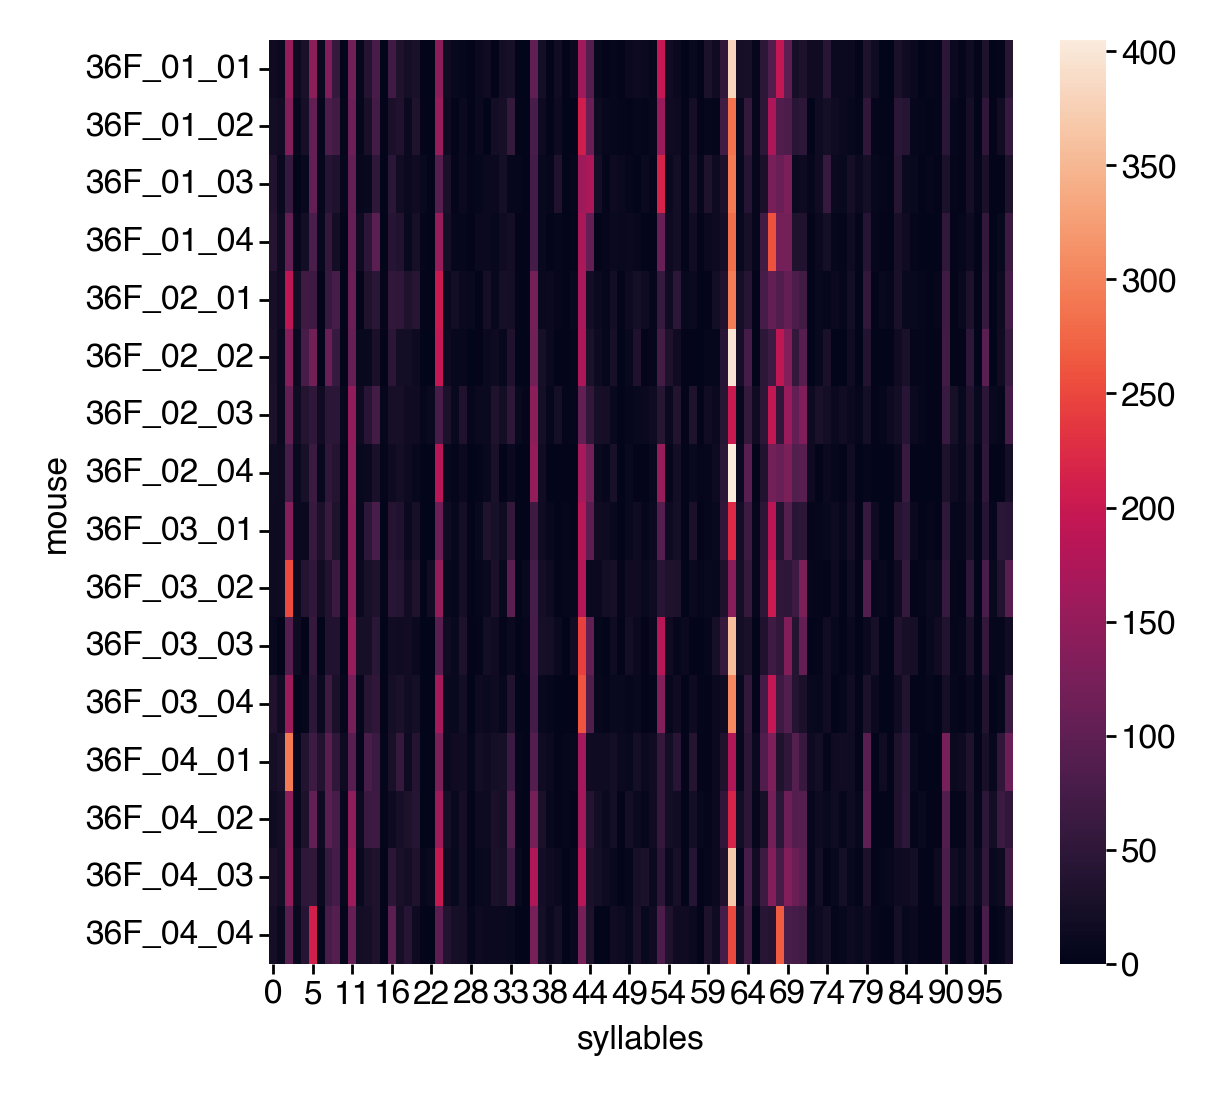

In [43]:
sns.heatmap(vc.pivot_table(index='mouse', columns='syllables', values='count', fill_value=0))

In [69]:
out = df.select(pl.col("age"), pl.col("mouse")).collect()

In [70]:
out.head()

age,mouse
i64,str
28,"""28F_03_03"""
28,"""28F_03_03"""
28,"""28F_03_03"""
28,"""28F_03_03"""
28,"""28F_03_03"""


In [74]:
mask = out.to_pandas().apply(lambda x: x['mouse'].startswith(str(x['age'])), axis=1)

In [75]:
mask.head()

0    True
1    True
2    True
3    True
4    True
dtype: bool

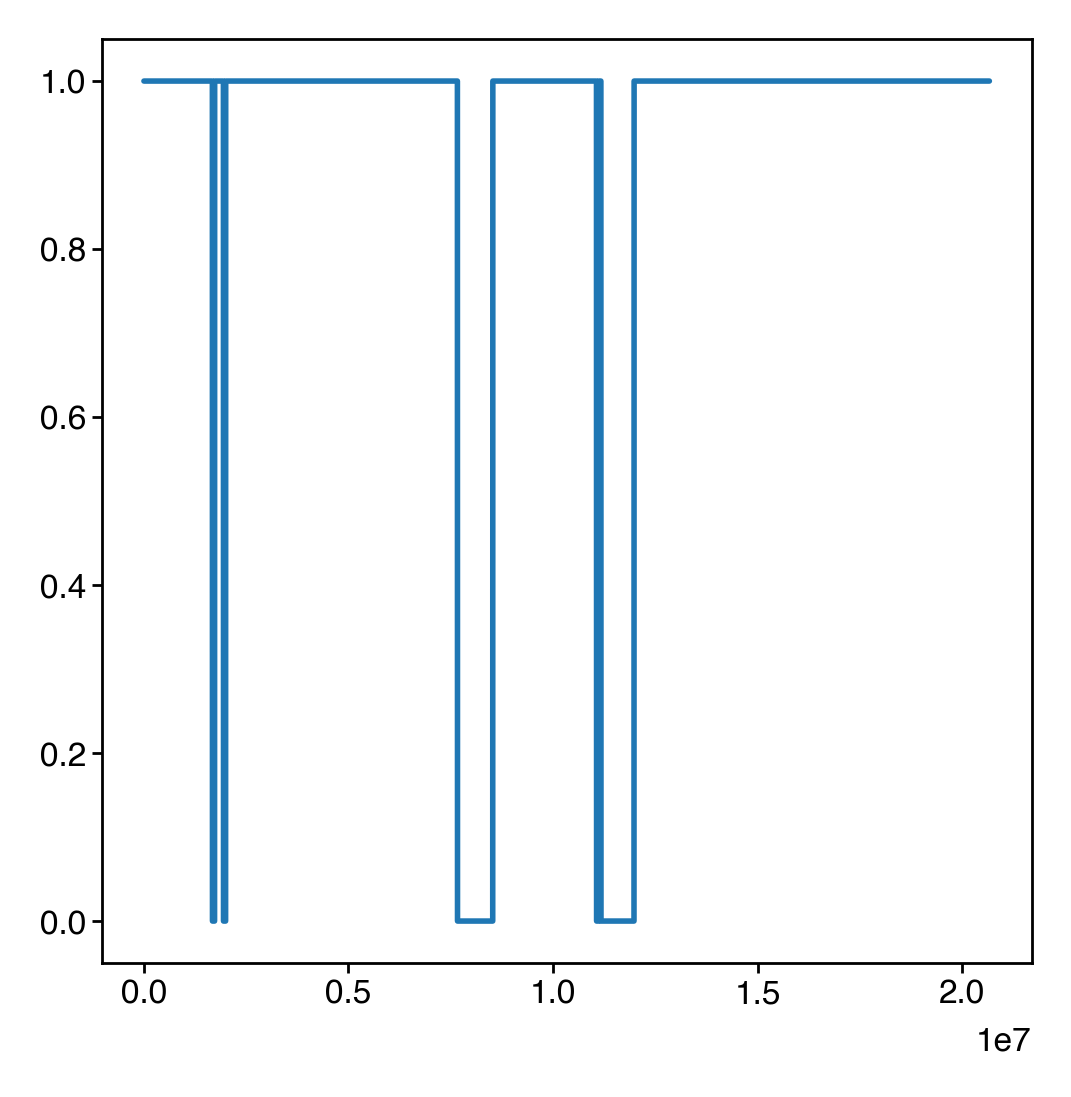

In [76]:
plt.plot(mask)

In [78]:
out.shape

(20667434, 2)

In [79]:
mask.shape

(20667434,)

In [81]:
filt = out.to_pandas()[~mask]

In [83]:
filt.drop_duplicates(subset=['mouse'])

,age,mouse
1672893,8,52F_02_03
1942720,8,52F_01_03
7663048,24,F24_01_02
7717016,24,F24_02_03
7770980,24,F24_02_02
7824939,24,F24_04_03
7878893,24,F24_04_04
7932860,24,F24_03_04
7986820,24,F24_03_01
8040783,24,F24_03_03


In [97]:
out = out.with_columns(pl.col("mouse").str.extract(r"(F?)(\d{1,3})(F?)", 2).cast(pl.Int16).alias("new_age"))

In [98]:
out.head()

age,mouse,new_age
i64,str,i16
28,"""28F_03_03""",28
28,"""28F_03_03""",28
28,"""28F_03_03""",28
28,"""28F_03_03""",28
28,"""28F_03_03""",28


In [99]:
mask = out['age'] == out['new_age']

In [100]:
out.filter(~mask).unique()

age,mouse,new_age
i64,str,i16
8,"""52F_02_03""",52
8,"""52F_01_03""",52


In [85]:
filt.drop_duplicates(subset=['mouse'])['mouse'].str.extract(r"(F?)(\d){1,2}(F?)")

,0,1,2
1672893,,2,F
1942720,,2,F
7663048,F,4,
7717016,F,4,
7770980,F,4,
7824939,F,4,
7878893,F,4,
7932860,F,4,
7986820,F,4,
8040783,F,4,


In [101]:
df = pl.scan_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11-1/ontogeny_males_syllable_df_v00.parquet')

In [103]:
out = df.select(pl.col("age"), pl.col("mouse"))
out = out.with_columns(pl.col("mouse").str.extract(r"(M?)(\d{1,3})(M?)", 2).cast(pl.Int16).alias("new_age")).collect()

In [105]:
mask = out['age'] == out['new_age']

In [108]:
out.unique().head()

age,mouse,new_age
i64,str,i16
4,"""4M_02_04""",4
84,"""84M_02""",84
115,"""115M_02_04""",115
12,"""12M_04_02""",12
44,"""44M_03""",44
